### Visual intuition for the other definition of variance


I always think of the [variance](https://en.wikipedia.org/wiki/Variance) of some random variable $X$ as $X$'s expected deviation from its mean, $\mu$. That is, I think of the variance as: $Var(X) =\mathbb{E}[(X - \mu)^2]$. Because $\mu$ is the expected value or average of $X$ you can also express the variance as:

$$Var(X)= \mathbb{E}[(X - \mathbb{E}[X])^2]$$

where $\mu = \mathbb{E}[X]$. 

On Wikipedia and in textbooks the variance is also sometimes defined as:

$$Var(X) =\mathbb{E}[X^2] - \mathbb{E}[X]^2$$

which is expected value of $X$ squared, minus the expected square of $X$. I never find this second definition intuitive. This is a visual demonstration of $Var(X) =\mathbb{E}[X^2] - \mathbb{E}[X]^2$. (If you are curious about the algebra too, see the end of the post).

### Get some data

Let's start by drawing some data from a 1 dimensional normal with some mean and some standard deviation. I'll make a histogram to visualize the data. I'll also plot the actual data as blue dots along the x axis. Each little blue dot along the x-axis is some datapoint $x_i$.

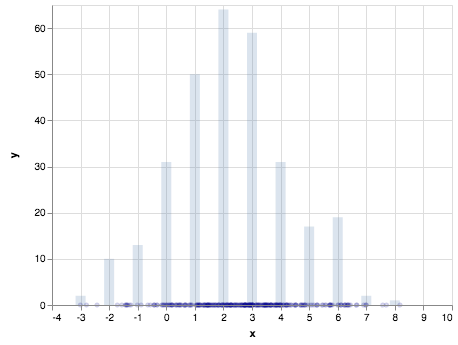

In [32]:
import numpy as np
from helper import *

mu, sigma = 2.5, 2 # mean and standard deviation
N = 300
nbins = 10

s =  np.random.normal(mu, sigma, size=N)

values, bins = np.histogram(s, bins=np.arange(-3, nbins + 1))

histogram = make_bar_chart(size=10, opacity=.2, X=bins, Y=values)

x_points = make_scatter_chart(size=10, opacity=.2, X=s, Y=np.zeros(len(s)))

histogram + x_points

If we display each $x_i^2$ corresponding to each $x_i$ along the y-axis with a red dot, along the curve of $X^2$. I show a little black line leading from each $x_i$ to its corresponding $x_i^2$.

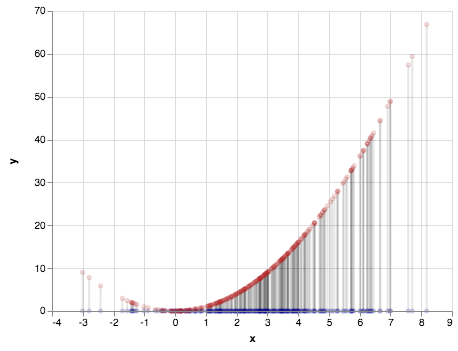

In [33]:
x2_points = make_scatter_chart(size=10, opacity=.2, X=s, Y=[i ** 2 for i in s], color="firebrick")

guide_lines = make_guide_lines(s)

functools.reduce(lambda a,b : a+b,guide_lines + [x_points  + x2_points])

Because each $x$ has equal probability, if we simple average the y-coordinates of the black dots, we get the expected value of $X^2$. That is, we get $\mathbb{E}[X^2]$. We show this as a big dot on the chart. 

We can also plot the expected value of each $x_i$, which is equal to $\mathbb{E}[X]$. We show this as a big blue dot.

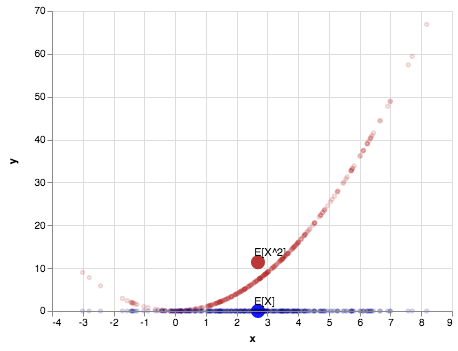

In [38]:
expected_x2, labels2 = make_scatter_chart_with_labels(X=[np.mean(s)], Y=[np.mean([i ** 2 for i in s])], L=["E[X^2]"], color="firebrick")
expected_x, labels = make_scatter_chart_with_labels(X=[np.mean(s)], Y=[0], L=["E[X]"])

expected_x + labels + expected_x2 + labels2 + x2_points + x_points

If we square the blue dot $\mathbb{E}[X]$ we get $\mathbb{E}[X]^2$. We show this as a big black dot. 

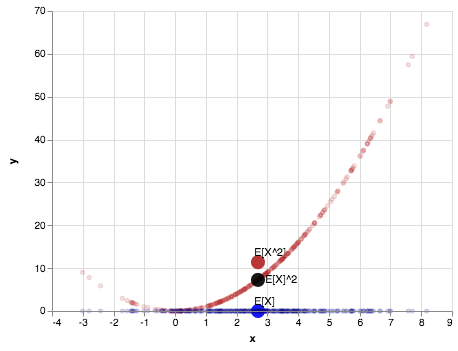

In [39]:
dt = make_altair_object_labels(X=[np.mean(s)], Y=[np.mean(s)** 2], L=["E[X]^2"])

c7 = alt.Chart(dt).mark_point(opacity=expectation_opacity, size=expectation_size, color="black", filled=True).encode(
    x='x:Q',  # specify ordinal data
    y='y:Q',  # specify quantitative data
)

text7 = c7.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='label:N'
)


expected_x + labels + expected_x2 + labels2 + x2_points + x_points + c7 + text7

The distance between $\mathbb{E}[X^2]$ and $\mathbb{E}[X]^2$ is $\mathbb{E}[X^2]$ - $\mathbb{E}[X]^2$, the variance!

Because $\mathbb{E}[X^2]$ is always above the black squares line, this also doubles as a visual proof that the variance is always non-negative. (See also this [awesome visual proof](http://mark.reid.name/blog/behold-jensens-inequality.html) of Jensen's Inequality, which gave me the idea for this post).


### Plowing through the algebra 

This post is devoted to providing a visual intution for the alternate definition of variance. If you are curious about the algebra behind the definition, here is a detailed derivation as well.

Starting from the definition and expanding the square we have

$$Var(X) = \mathbb{E}[(x - \mathbb{E}[X])^2]$$

$$Var(X) = \mathbb{E}[X^2 - 2XE[X] + \mathbb{E}[X]^2]$$

From linearity of expectation we have:

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[2XE[X]] +  \mathbb{E}[\mathbb{E}[X]^2]$$

We can pull out the constants 2 and $\mathbb{E}[X]$ from the expectation in the middle term to get:

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X]\mathbb{E}E[X] +  \mathbb{E}[\mathbb{E}[X^2]$$

We can also express the middle term as $2\mathbb{E}[X^2]$ to get

$$Var(X) = \mathbb{E}[X^2]-  2\mathbb{E}[X^2]+  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2]-  \mathbb{E}[X^2] -  \mathbb{E}[X^2]+  \mathbb{E}[X^2]$$

$$Var(X) = \mathbb{E}[X^2] -   \mathbb{E}[X^2]$$